<a href="https://colab.research.google.com/github/suOdeyemi/Housen-Predication---Linear-Regression/blob/main/Linear_Regression(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About dataset (Link): https://www.kaggle.com/datasets/fratzcan/usa-house-prices
- Use Linear Regression to build models that can predict house prices based multiple factors such as bedrooms, bathrooms, year built, etc.


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Reads CSV and prints out the first observartions
df = pd.read_csv('USA Housing Dataset.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/9/14 0:00,376000.0,3,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,5/9/14 0:00,800000.0,4,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,5/9/14 0:00,2238888.0,5,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,5/9/14 0:00,324000.0,3,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,5/10/14 0:00,549900.0,5,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [ ]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   int64  
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

- 18 columns (features) in this dataset

In [ ]:
# Basic summary of the dataset
print(df.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.140000e+03  4140.000000  4140.000000   4140.000000  4.140000e+03   
mean   5.530629e+05     3.400483     2.163043   2143.638889  1.469764e+04   
std    5.836865e+05     0.903939     0.784733    957.481621  3.587684e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.200000e+05     3.000000     1.750000   1470.000000  5.000000e+03   
50%    4.600000e+05     3.000000     2.250000   1980.000000  7.676000e+03   
75%    6.591250e+05     4.000000     2.500000   2620.000000  1.100000e+04   
max    2.659000e+07     8.000000     6.750000  10040.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4140.000000  4140.000000  4140.000000  4140.000000  4140.000000   
mean      1.514130     0.007488     0.246618     3.452415  1831.351449   
std       0.534941     0.086219     0.790619     0.678533   861.382947   
min       

- Note: Price standard deviation is incrediably large. It's 5.836865e+05
    - Natural Log will be needed for price to normalize the value.

In [ ]:
# Formula for the linear regression model (first impression)
model = smf.ols(formula = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + condition + yr_built', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     168.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          2.23e-192
Time:                        00:57:29   Log-Likelihood:                -60388.
No. Observations:                4140   AIC:                         1.208e+05
Df Residuals:                    4133   BIC:                         1.208e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.775e+06   6.78e+05      7.043      

The model explains about 20% (which is not that great) of the price variance, with variables like bedrooms, bathrooms, and square footage having a significant impact on price. The F-statistic suggests the model is overall significant, though there could be multicollinearity. The residuals hint at some issues with normality. The linear regression equation is:

$$
\text{Price} = 4,775,000 - 72,660 \cdot \text{bedrooms} + 71,390 \cdot \text{bathrooms} + 279.38 \cdot \text{sqft\_living}
$$

$$
- 0.64 \cdot \text{sqft\_lot} + 22,770 \cdot \text{condition} - 2,434 \cdot \text{yr\_built} + \varepsilon
$$

This gives us a basic understanding of how these features influence house prices.

In [ ]:
# Correlation raking for ALL features

numerical_df = df.select_dtypes(include=np.number)  # Select only numeric columns
corr = numerical_df.corr()['price'].sort_values(ascending=False)

corr

,price
price,1.000000
sqft_living,0.418528
sqft_above,0.355214
bathrooms,0.317785
view,0.217553
sqft_basement,0.204066
bedrooms,0.188765
floors,0.143180
waterfront,0.131401
sqft_lot,0.045964


- This allows me to me correlations between all the numerical features

In [ ]:
# New model equation (without interaction)

model2 = smf.ols(formula = 'price ~ sqft_living + sqft_above + bathrooms + view + sqft_basement + bedrooms + floors + waterfront' , data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     138.8
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          3.16e-184
Time:                        00:57:35   Log-Likelihood:                -60404.
No. Observations:                4140   AIC:                         1.208e+05
Df Residuals:                    4132   BIC:                         1.209e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.24e+05   3.72e+04      3.331

Model 2 explains about 19% of the variation in house prices, with key predictors such as sqft_living, sqft_above, view, sqft_basement, bedrooms, and waterfront. The model includes additional factors compared to Model 1, like sqft_above and view, which can significantly impact price. However, there is an indication of multicollinearity, which might weaken the reliability of some predictors.

The equation for Model 2 is:

$$
\text{Price} = 124,000 + 174.32 \cdot \text{sqft_living} + 76.98 \cdot \text{sqft_above} + 15,600 \cdot \text{bathrooms}
$$

$$
+ 52,470 \cdot \text{view} + 97.33 \cdot \text{sqft_basement} - 51,470 \cdot \text{bedrooms} + 6,479 \cdot \text{floors}
$$

$$
+ 339,700 \cdot \text{waterfront} + \varepsilon
$$

Despite the addition of more features, the overall explanatory power remains similar to Model 1. Both models highlight the importance of house size, with Model 2 focusing more on specific features like view and waterfront.

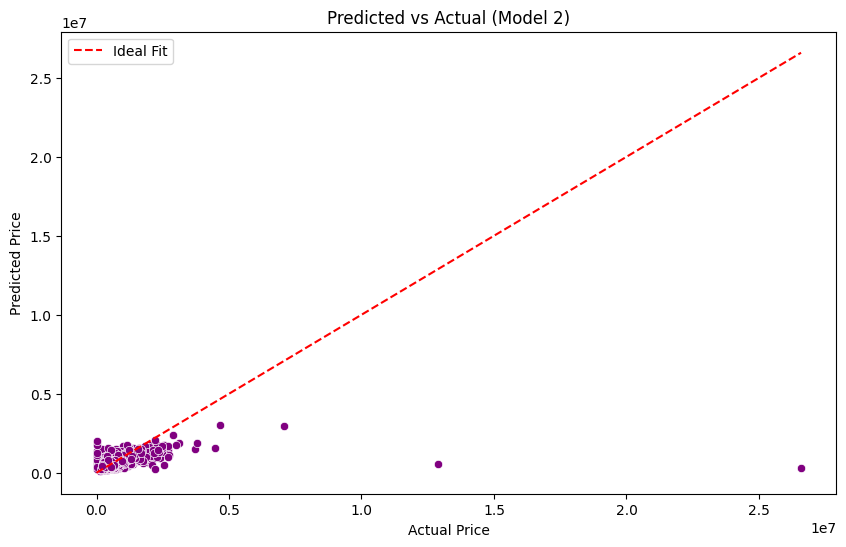

In [ ]:
# Generate predictions from model2
df['predicted_price_model2'] = model2.predict(df)

# Create a new column with the actual price
df['actual_price'] = df['price']

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['actual_price'], y=df['predicted_price_model2'], color = 'purple')
plt.plot([df['actual_price'].min(), df['actual_price'].max()],
         [df['actual_price'].min(), df['actual_price'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.title('Predicted vs Actual (Model 2)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

- That does not look great. This indicates that the model is underpredicating the price (since majority of the data is clustered around 0).

In [ ]:
df['sqft_total'] = df['sqft_above'] + df['sqft_basement'] # Since both are correlated to price, getting the total sqft of the space will be more efficient
df['house_age'] = 2025 - df['yr_built'] # possible improvements


# Introduces non-linearity to the model to account for cases where larger homes have exponentially higher prices
df['sqft_living_sq'] = df['sqft_living'] ** 2
df[['sqft_living_sq', 'price']].corr() # checks correlation between new squared variable

,sqft_living_sq,price
sqft_living_sq,1.000000,0.437215
price,0.437215,1.000000


In [ ]:
model3 = smf.ols(formula = 'price ~ sqft_living_sq + sqft_total + bathrooms + bedrooms + house_age',
                 data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     213.6
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          3.58e-203
Time:                        00:57:49   Log-Likelihood:                -60366.
No. Observations:                4140   AIC:                         1.207e+05
Df Residuals:                    4134   BIC:                         1.208e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.996e+04   4.85e+04      1.

While Model 3 provides a slight improvement over the previous models, its R-squared value still indicates that a large portion of price variability is unexplained. The added variables, like sqft_living_sq and house_age, offer valuable insights into the relationship between housing features and prices. Future models could explore additional features or non-linear relationships to further improve the model’s predictive power.

$$
\text{Price} = 79,960 + 0.0324 \cdot \text{sqft_living_sq} + 67.43 \cdot \text{sqft_total}
$$

$$
+ 84,540 \cdot \text{bathrooms} - 48,230 \cdot \text{bedrooms} + 2,418 \cdot \text{house_age} + \varepsilon
$$


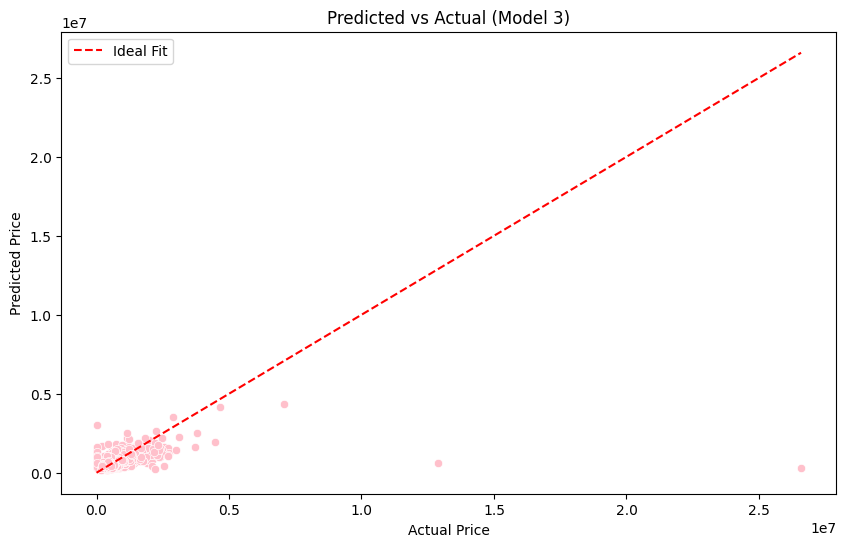

In [ ]:
# Generate predictions from model3
df['predicted_price_model3'] = model3.predict(df)

# Create a new column with the actual price
df['actual_price'] = df['price']

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['actual_price'], y=df['predicted_price_model3'], color = 'pink')
plt.plot([df['actual_price'].min(), df['actual_price'].max()],
         [df['actual_price'].min(), df['actual_price'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.title('Predicted vs Actual (Model 3)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

In [ ]:
df_filtered = df[df['price'] > 0]
df.shape

model4 = smf.ols(formula = 'price ~ sqft_living_sq + sqft_total + bathrooms + bedrooms + house_age',
                 data=df_filtered).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     237.1
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          7.22e-223
Time:                        00:57:55   Log-Likelihood:                -59602.
No. Observations:                4091   AIC:                         1.192e+05
Df Residuals:                    4085   BIC:                         1.193e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.307e+04   4.83e+04      1.

Model 4 has an R-squared of 0.225, slightly better than Model 3’s 0.205, meaning it explains about 22.5% of the variation in house prices. The key variables are:


$$
\text{Price} = 73,070 + 0.0385 \cdot \text{sqft_living_sq} + 37.88 \cdot \text{sqft_total}
$$

$$
+ 100,900 \cdot \text{bathrooms} - 47,300 \cdot \text{bedrooms} + 2,550 \cdot \text{house_age} + \varepsilon
$$


It still doesn’t explain most of the price variation, but it’s a slight improvement. sqft_living_sq, bathrooms, and house_age are significant predictors. The model shows that larger living space and more bathrooms generally increase the price, while more bedrooms reduce it.

Compared to Model 3, the changes are small, and while it's a bit better, there’s still room for improvement in explaining house prices more accurately.

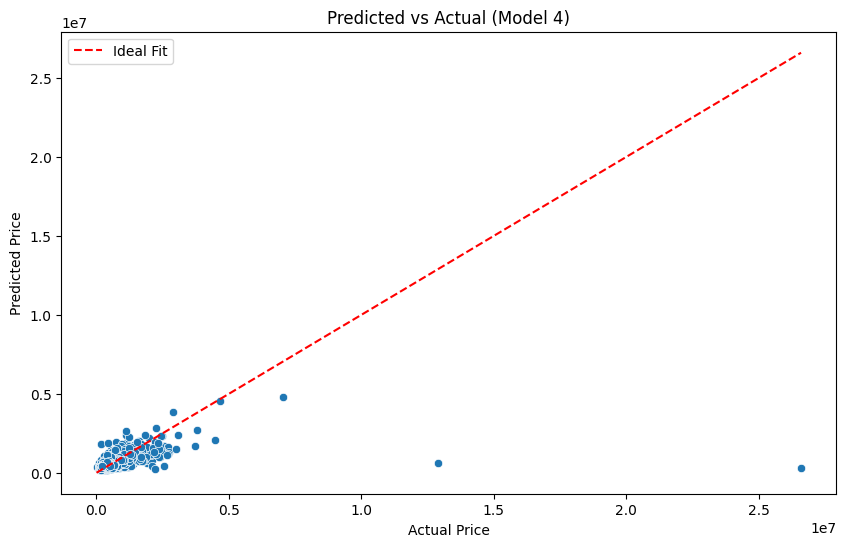

In [ ]:
# Generate predictions from model4
df_filtered.loc[:, 'predicted_price_model4'] = model4.predict(df_filtered)
df_filtered = df_filtered.copy()
df_filtered['actual_price'] = df_filtered['price']

# Create a new column with the actual price
df_filtered['actual_price'] = df_filtered['price']

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['actual_price'], y=df_filtered['predicted_price_model4'])
plt.plot([df_filtered['actual_price'].min(), df_filtered['actual_price'].max()],
         [df_filtered['actual_price'].min(), df_filtered['actual_price'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.title('Predicted vs Actual (Model 4)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

- Even with the filtered data, the clustering around the 0 still indicated underprediction.

In [ ]:
model5 = smf.ols(formula = 'np.log(price) ~ sqft_living_sq + sqft_total + bathrooms + bedrooms + house_age',
                 data=df_filtered).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     851.1
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:58:02   Log-Likelihood:                -1881.4
No. Observations:                4091   AIC:                             3775.
Df Residuals:                    4085   BIC:                             3813.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.7853      0.036    327.

Model 5, which uses the natural logarithm of price, has an R-squared of 0.510, a significant improvement over previous models. This means the model explains 51% of the variation in house prices, a major jump compared to the earlier models. The equation is:

$$
\ln(\text{Price}) = 11.7853 - 3.035 \times 10^{-8} \cdot \text{sqft_living_sq} + 0.0005 \cdot \text{sqft_total}
$$

$$
+ 0.1671 \cdot \text{bathrooms} - 0.0908 \cdot \text{bedrooms} + 0.0042 \cdot \text{house_age} + \varepsilon
$$

In simple terms, it shows that more space (sqft_total) and more bathrooms increase the price, while more bedrooms actually lower it a bit. The age of the house has a positive effect, too. Transforming the price with a logarithm seems to give a much clearer picture of how these factors play out. Compared to the earlier models, this one fits the data much better.

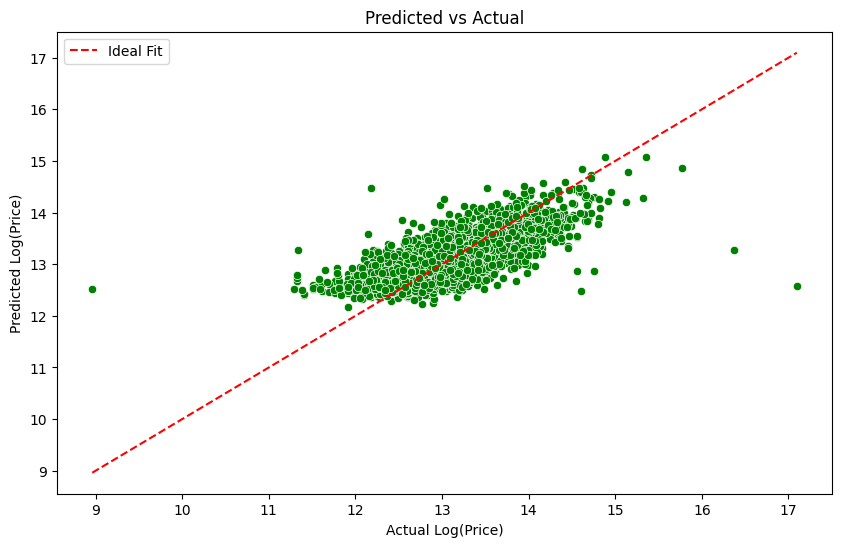

In [ ]:
# Generate predictions
df_filtered.loc[:, 'predicted_price_model5'] = model5.predict(df_filtered)
df_filtered = df_filtered.copy()
df_filtered['actual_price'] = df_filtered['price']

# Create a new column with the log-transformed price
df_filtered['log_price'] = np.log(df_filtered['price'])

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['log_price'], y=df_filtered['predicted_price_model5'], color = 'green')
plt.plot([df_filtered['log_price'].min(), df_filtered['log_price'].max()],
         [df_filtered['log_price'].min(), df_filtered['log_price'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Log(Price)')
plt.ylabel('Predicted Log(Price)')
plt.legend()
plt.show()

Oh wow! Taking the log of the price reduces the skewness and kurtosis of the graph, making it slightly more normal.

In [ ]:
# Fit the OLS model --> The variable Waterfront is already categorical
# Waterfront already has 1's and 0's

#Creates categorical variables for dummy variable 'view'
df_filtered['view2'] = (df_filtered['view'] == 2).astype(int)
df_filtered['view3'] = (df_filtered['view'] == 3).astype(int)
df_filtered['view4'] = (df_filtered['view'] == 4).astype(int)

model6 = smf.ols(formula='np.log(price) ~ sqft_living_sq + sqft_total + bathrooms + bedrooms + house_age + waterfront',
                 data=df_filtered).fit()

print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     718.9
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:13:34   Log-Likelihood:                -1867.0
No. Observations:                4091   AIC:                             3748.
Df Residuals:                    4084   BIC:                             3792.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.7769      0.036    327.

Model 6 has an R-squared of 0.514, meaning it explains just over half of the variation in house prices. Here’s the equation:

$$
\log(\text{Price}) = 11.7769 - 3.283 \times 10^{-8} \cdot \text{sqft_living_sq} + 0.0006 \cdot \text{sqft_total} + 0.1650 \cdot \text{bathrooms}
$$

$$
- 0.0881 \cdot \text{bedrooms} + 0.0041 \cdot \text{house_age} + 0.3984 \cdot \text{waterfront} + \varepsilon
$$

The key takeaway: properties with waterfront views add significant value. Everything else is as expected: more space and a newer house lead to higher prices, but more bedrooms slightly lower the price. The model has improved.

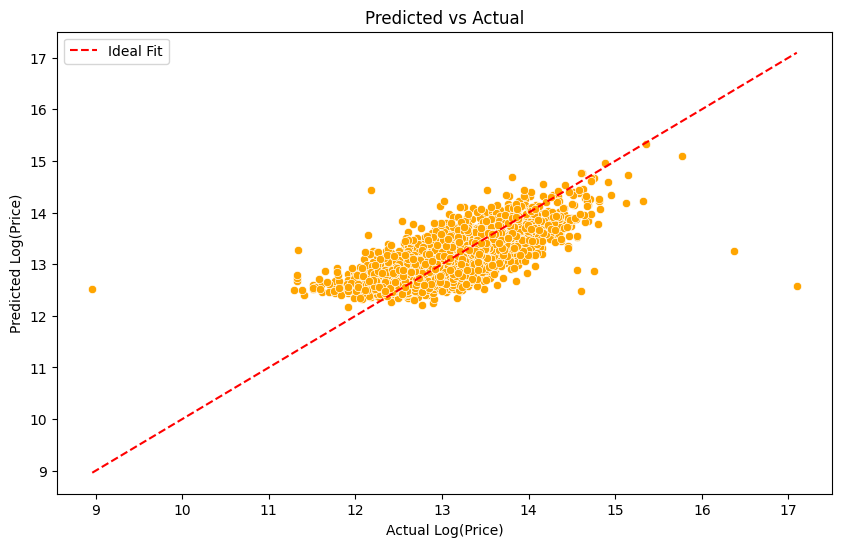

In [ ]:
# Generate predictions
df_filtered.loc[:, 'predicted_price_model6'] = model6.predict(df_filtered)
df_filtered = df_filtered.copy()
df_filtered['actual_price'] = df_filtered['price']

# Create a new column with the log-transformed price
df_filtered['log_price'] = np.log(df_filtered['price'])

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['log_price'], y=df_filtered['predicted_price_model6'], color = 'orange')
plt.plot([df_filtered['log_price'].min(), df_filtered['log_price'].max()],
         [df_filtered['log_price'].min(), df_filtered['log_price'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Log(Price)')
plt.ylabel('Predicted Log(Price)')
plt.legend()
plt.show()

The data is more spread out after adding the categorical variable, waterfront.

- Looking back at the dataset, I realized that waterfront is already in binary numbers, 1's for yes and 0's for no. So I checked to see what other variables might be categorical and the variable 'view' had ratings from 1-4. 1 indicating bad reviews, 4 indicating great views. I decided to make another model to use this variable.

In [ ]:
# OLS model including 2 categorical variables, waterfront and view

model7= smf.ols(formula='np.log(price) ~ sqft_living_sq + sqft_total + bathrooms + bedrooms + house_age + waterfront + view2 + view3 + view4',
                 data=df_filtered).fit()

print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     488.1
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:16:38   Log-Likelihood:                -1847.0
No. Observations:                4091   AIC:                             3714.
Df Residuals:                    4081   BIC:                             3777.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.8007      0.036    327.

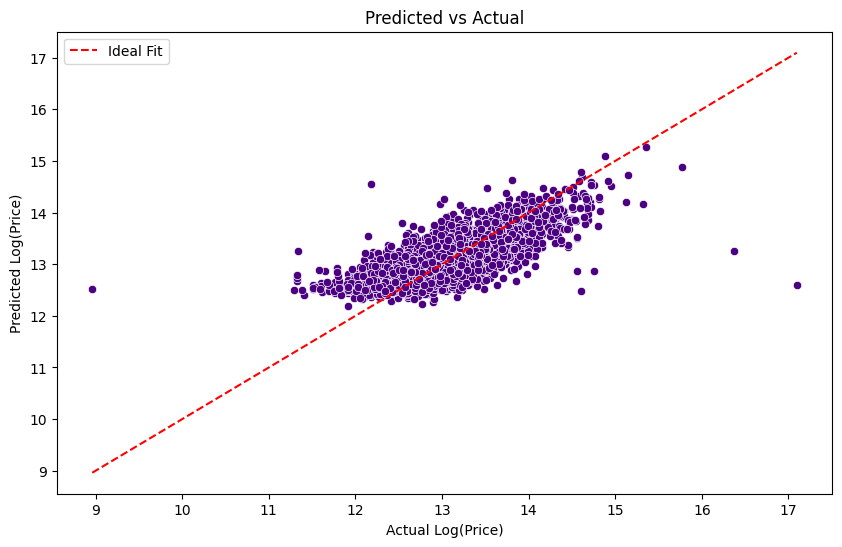

In [ ]:
# Generate predictions
df_filtered.loc[:, 'predicted_price_model7'] = model7.predict(df_filtered)
df_filtered = df_filtered.copy()
df_filtered['actual_price'] = df_filtered['price']

# Create a new column with the log-transformed price
df_filtered['log_price'] = np.log(df_filtered['price'])

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['log_price'], y=df_filtered['predicted_price_model7'], color = 'indigo')
plt.plot([df_filtered['log_price'].min(), df_filtered['log_price'].max()],
         [df_filtered['log_price'].min(), df_filtered['log_price'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Log(Price)')
plt.ylabel('Predicted Log(Price)')
plt.legend()
plt.show()

This is still pretty centered with a few outliers.

In [ ]:
# Linear Regression equation with interactive variables view and sqft_living_sq

model8 = smf.ols(formula='np.log(price) ~ I(sqft_living_sq) * view4 + sqft_total + bathrooms + bedrooms + house_age + I(waterfront) + I(view2) + view3 + I(view4)',
                 data=df_filtered).fit()

print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     439.2
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:28:30   Log-Likelihood:                -1847.0
No. Observations:                4091   AIC:                             3716.
Df Residuals:                    4080   BIC:                             3785.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Model 8 the R-squared value slightly increased to 0.518, indicating it explains about 51.8% of the variation in house prices. Here's the equation:

$$
\log(\text{price}) = 11.8036 - 3.22 \times 10^{-8} \cdot \text{sqft_living_sq} + 0.0005 \cdot \text{sqft_total} + 0.1615 \cdot \text{bathrooms}
$$

$$
- 0.0841 \cdot \text{bedrooms} + 0.0039 \cdot \text{house_age} + 0.2268 \cdot \text{waterfront} + 0.0868 \cdot \text{view2}
$$

$$
+ 0.1682 \cdot \text{view3} + 0.1333 \cdot \text{view4} - 1.43 \times 10^{-9} \cdot (\text{sqft_living_sq} \times \text{view4}) + \varepsilon
$$

The key addition is the interaction term between living space and view4, although it isn’t significant (p-value of 0.692). Viewside with fantastic ratings still slighly increase the price, while more bedrooms decrease it. The model shows solid performance, but the interaction term's lack of significance suggests it's not adding much value in this case (which definelty suprised me).

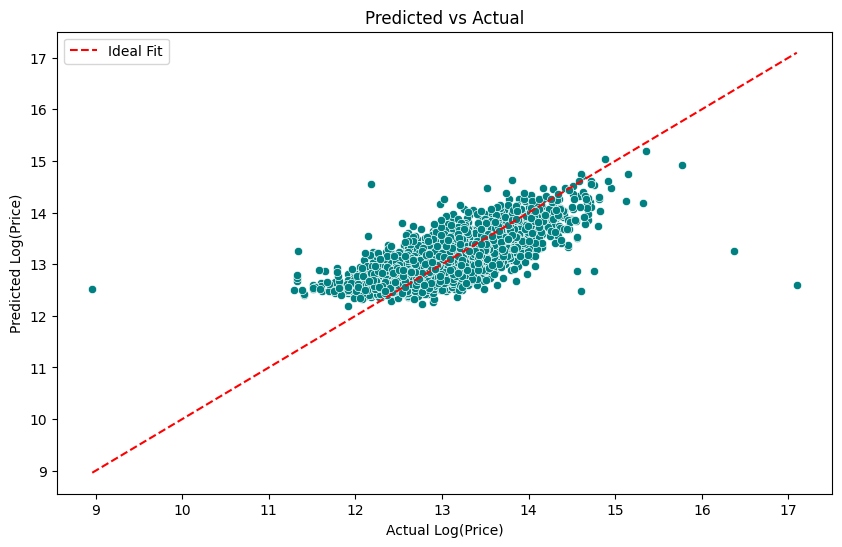

In [ ]:
# Generate predictions
df_filtered.loc[:, 'predicted_price_model8'] = model8.predict(df_filtered)
df_filtered = df_filtered.copy()
df_filtered['actual_price'] = df_filtered['price']

# Create a new column with the log-transformed price
df_filtered['log_price'] = np.log(df_filtered['price'])

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['log_price'], y=df_filtered['predicted_price_model8'], color = 'teal')
plt.plot([df_filtered['log_price'].min(), df_filtered['log_price'].max()],
         [df_filtered['log_price'].min(), df_filtered['log_price'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Log(Price)')
plt.ylabel('Predicted Log(Price)')
plt.legend()
plt.show()

This looks redundant, however, this includes the interaction between the sqft_living variable and the view4 variable. I expected to see slightly better results, however, I'm left with the R value slightly bigger but not by much.